In [1]:
import tweepy

# Insert Tweepy Authentication Codes Here

In [2]:
import time
import pandas as pd
import datetime

def scrapetweets(text_query, dateto):
    try:

        tweets = tweepy.Cursor(api.search_full_archive,environment_name='dltweetscrape',query=text_query,toDate=dateto,maxResults=500).items(500)
 
        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
        tweets_df = pd.DataFrame(tweets_list)
    
        return tweets_df
 
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [3]:
a_text_query = '#VoteBiden OR #VoteBlue'
b_text_query = '#VoteTrump OR #VoteRed OR #MAGA OR #Trump2020 OR #4MoreYears'

In [5]:
# T-14 Days
todate = '202010200000'

a_tweets_df = scrapetweets(a_text_query, todate)
for a in range(0,3):
    toDT = str(int(todate) + 200 + a*200)
    a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, toDT))

In [6]:
# T-30 Days
todate = '202010030000'

a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, todate))
for a in range(0,3):
    toDT = str(int(todate) + 200 + a*200)
    a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, toDT))

In [7]:
# T-90 Days
todate = '202008030000'

a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, todate))
for a in range(0,3):
    toDT = str(int(todate) + 200 + a*200)
    a_tweets_df = a_tweets_df.append(scrapetweets(a_text_query, toDT))

In [8]:
# T-14 Days
todate = '202010200000'

b_tweets_df = scrapetweets(b_text_query, todate)
for b in range(0,3):
    toDT = str(int(todate) + 200 + b*200)
    b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, toDT))

In [9]:
# T-30 Days
todate = '202010030000'

b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, todate))
for b in range(0,3):
    toDT = str(int(todate) + 200 + b*200)
    b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, toDT))

In [10]:
# T-90 Days
todate = '202008030000'

b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, todate))
for b in range(0,3):
    toDT = str(int(todate) + 200 + b*200)
    b_tweets_df = b_tweets_df.append(scrapetweets(b_text_query, toDT))

In [11]:
a_tweets_df.columns = ['Created At','Tweet Id','Tweet']
b_tweets_df.columns = ['Created At','Tweet Id','Tweet']

In [12]:
a_tweets_df.describe()

,Tweet Id
count,6.000000e+03
mean,1.306899e+18
std,1.214276e+16
min,1.290053e+18
25%,1.290125e+18
50%,1.312215e+18
75%,1.318347e+18
max,1.318432e+18


In [13]:
b_tweets_df.describe()

,Tweet Id
count,6.000000e+03
mean,1.306909e+18
std,1.213777e+16
min,1.290072e+18
25%,1.290151e+18
50%,1.312224e+18
75%,1.318348e+18
max,1.318432e+18


In [14]:
a_tweets_df['Label'] = 'Biden'
b_tweets_df['Label'] = 'Trump'

tweets_df = pd.concat([a_tweets_df,b_tweets_df])

tweets_df['Length'] = tweets_df['Tweet'].apply(len)

tweets_df = tweets_df.sample(frac=1)

tweets_df.head()

,Created At,Tweet Id,Tweet,Label,Length
492,2020-10-03 00:53:53,1312194123957329920,A true leader! #CountryOverParty #VoteBiden #V...,Biden,98
209,2020-10-20 03:56:05,1318400572014415873,RT @TamikaGHamilton: Make this go viral @realD...,Trump,140
346,2020-10-20 05:08:45,1318418857581830146,#TrumpIsCompromised From Day 1 Trump has take...,Biden,144
156,2020-08-02 23:26:29,1290066469200334849,RT @petro21805: Donald Trump announced that he...,Biden,140
156,2020-08-03 03:16:01,1290124234040020993,These Republicans hate government and don't wa...,Biden,140


In [15]:
tweets_df.to_csv("tweetsfortrain.csv", index = False, header = True)

In [6]:
# Only run this line if reading from existing .csv file
import pandas as pd
tweets_df = pd.read_csv("tweetsfortrain.csv")

In [7]:
tweets_df.head()

,Created At,Tweet Id,Tweet,Label,Length
0,2020-10-03 00:53:53,1312194123957329920,A true leader! #CountryOverParty #VoteBiden #V...,Biden,98
1,2020-10-20 03:56:05,1318400572014415873,RT @TamikaGHamilton: Make this go viral @realD...,Trump,140
2,2020-10-20 05:08:45,1318418857581830146,#TrumpIsCompromised From Day 1 Trump has take...,Biden,144
3,2020-08-02 23:26:29,1290066469200334849,RT @petro21805: Donald Trump announced that he...,Biden,140
4,2020-08-03 03:16:01,1290124234040020993,These Republicans hate government and don't wa...,Biden,140


In [8]:
tweets_df.drop_duplicates(subset='Tweet',inplace=True)

count    6559.000000
mean      116.777100
std        33.465622
min         9.000000
25%        98.500000
50%       138.000000
75%       140.000000
max       152.000000
Name: Length, dtype: float64

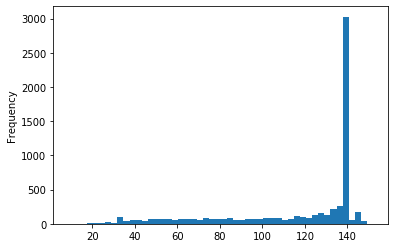

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

tweets_df['Length'].plot(bins=50, kind='hist') 
tweets_df['Length'].describe()

In [10]:
import string
import re
from nltk.corpus import stopwords
from nltk.util import ngrams

def text_process(mess):

#    mess = re.sub('@[^\s]+', 'AT_USER', mess)
    
    mess = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', mess)
    
#    mess = re.sub('#[^\s]+', 'HASHTAG', mess)
    
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    words = [word.lower() for word in nopunc.split() if word.lower() not in set(stopwords.words('english') + ['url','rt','hashtag'])]

    return words

#    return ngrams(words,2)

tweets_df['Tweet'].head(5).apply(text_process)

0    [true, leader, countryoverparty, votebiden, vo...
1    [tamikaghamilton, make, go, viral, realdonaldt...
2    [trumpiscompromised, day, 1, trump, taken, pat...
3    [petro21805, donald, trump, announced, plans, ...
4    [republicans, hate, government, dont, want, go...
Name: Tweet, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(tweets_df['Tweet'])
print(len(bow_transformer.vocabulary_))

16633


In [12]:
tweets_bow = bow_transformer.transform(tweets_df['Tweet'])
print('Shape of Sparse Matrix: ', tweets_bow.shape)
print('Amount of Non-Zero occurences: ', tweets_bow.nnz)

Shape of Sparse Matrix:  (6559, 16633)
Amount of Non-Zero occurences:  61908


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(tweets_bow)

tweets_tfidf = tfidf_transformer.transform(tweets_bow)
print(tweets_tfidf.shape)

(6559, 16633)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, label_train, label_test = train_test_split(tweets_df['Tweet'], tweets_df['Label'], test_size=0.2)

print(len(tweet_train), len(tweet_test), len(tweet_train) + len(tweet_test))

5247 1312 6559


In [15]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [16]:
pipeline.fit(tweet_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd5d95390d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
predictions = pipeline.predict(tweet_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

       Biden       0.86      0.90      0.88       573
       Trump       0.92      0.88      0.90       739

    accuracy                           0.89      1312
   macro avg       0.89      0.89      0.89      1312
weighted avg       0.89      0.89      0.89      1312



In [19]:
from sklearn.externals import joblib

joblib.dump(pipeline, 'election_nlp_v1.x')

/Users/lauhiuyan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['election_nlp_v1.x']

In [29]:
c_text_query = '#2020election OR #uselection'

# T-30 Days
todate = '202010030000'

c_tweets_df = scrapetweets(c_text_query, todate)
for c in range(0,3):
    toDT = str(int(todate) + 200 + c*200)
    c_tweets_df = c_tweets_df.append(scrapetweets(c_text_query, toDT))

In [30]:
c_tweets_df.columns = ['Created At','Tweet Id','Tweet']

In [31]:
c_tweets_df.describe()

,Tweet Id
count,2.000000e+03
mean,1.312178e+18
std,3.384499e+13
min,1.312118e+18
25%,1.312153e+18
50%,1.312173e+18
75%,1.312202e+18
max,1.312271e+18


In [32]:
c_tweets_df['Length'] = c_tweets_df['Tweet'].apply(len)
c_tweets_df.head()

,Created At,Tweet Id,Tweet,Length
0,2020-10-02 23:59:15,1312180375267885057,RT @Raulpinaavila4: Get to know your ballot me...,140
1,2020-10-02 23:58:39,1312180225854251008,RT @Tairlisis: Who do you think will win the #...,61
2,2020-10-02 23:58:10,1312180102705283073,RT @ScottGilesMusic: #2020Election #AmericaOrT...,138
3,2020-10-02 23:57:38,1312179967866806272,#SanDiego @sdut endorses @JoeBiden for Preside...,92
4,2020-10-02 23:57:28,1312179926053732373,RT @qweekat: To ensure a postmark add a stamp ...,144


In [41]:
# Only run this line if reading from existing .csv file
c_tweets_df = pd.read_csv("predictionresult_2020_t90.csv")

In [42]:
c_tweets_df.drop_duplicates(subset='Tweet',inplace=True)

In [43]:
predictions_c = pipeline.predict(c_tweets_df['Tweet'])

In [44]:
predictions_c

array(['Biden', 'Biden', 'Biden', 'Biden', 'Biden', 'Biden', 'Biden',
       'Trump', 'Biden', 'Biden', 'Biden', 'Trump', 'Biden', 'Biden',
       'Biden', 'Trump', 'Trump', 'Biden', 'Biden', 'Biden', 'Biden',
       'Biden', 'Trump', 'Biden', 'Biden', 'Trump', 'Trump', 'Trump',
       'Biden', 'Biden', 'Biden', 'Trump', 'Biden', 'Biden', 'Biden',
       'Trump', 'Biden', 'Biden', 'Trump', 'Biden', 'Trump', 'Biden',
       'Trump', 'Trump', 'Trump', 'Biden', 'Biden', 'Biden', 'Biden',
       'Trump', 'Biden', 'Trump', 'Trump', 'Trump', 'Biden', 'Trump',
       'Trump', 'Trump', 'Biden', 'Biden', 'Biden', 'Biden', 'Biden',
       'Trump', 'Biden', 'Biden', 'Biden', 'Biden', 'Trump', 'Biden',
       'Biden', 'Biden', 'Biden', 'Trump', 'Trump', 'Trump', 'Biden',
       'Biden', 'Trump', 'Trump', 'Biden', 'Biden', 'Trump', 'Biden',
       'Biden', 'Biden', 'Trump', 'Trump', 'Trump', 'Biden', 'Biden',
       'Biden', 'Biden', 'Trump', 'Biden', 'Biden', 'Trump', 'Biden',
       'Biden', 'Bid

In [45]:
c_tweets_df['Prediction'] = predictions_c

In [46]:
import numpy as np
result_table = pd.DataFrame(np.array([sum(predictions_c == 'Trump'),sum(predictions_c == 'Biden')]) , columns=['Counts'])

In [47]:
result_table.rename(index={0: "Trump", 1: "Biden"}, inplace=True)

In [48]:
result_table

,Counts
Trump,186
Biden,312


In [49]:
c_tweets_df.to_csv("predictionresult_2020_t90_words.csv", index = False, header = True)